# Multi-layer Perceptron Classifier

In [78]:
import numpy as np
import pandas as pd

from scipy.stats import norm

from sklearn.datasets import make_blobs, make_circles, make_classification, make_moons


from matplotlib import pyplot
import matplotlib.cm as cm
from random import sample

## Generating Some Example Data with 2 Features

In [162]:
n_feature = 2 # the number of features
n_components = 2 # the number of clusters

n=2000 # the number of total samples

In [163]:
# generate isotropic Gaussian blobs (data from mixture Gaussian distributions)
# X, y = make_blobs(n_samples=n, # the number of total samples
#                   centers=n_components, # the number of clusters
#                   n_features=n_feature, # the number of features
#                   cluster_std = [2] * n_components, # the std of each cluster
#                   random_state=2) # 2

# X
X, y = make_circles(n_samples = n, noise=0.2, factor=0.5, random_state=1)

In [164]:
# Just to show you what is inside it. We print the first 10 elements of this numpy array. 
y[:10]

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0])

## Visualizing our example data

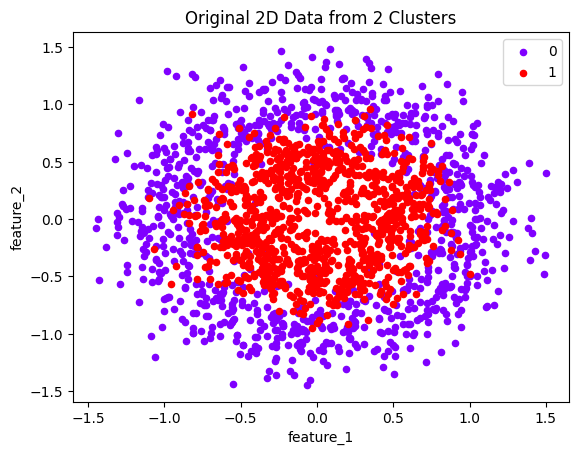

In [165]:
# scatter plot, data points annotated by different colors
df = pd.DataFrame(dict(feature_1=X[:,0], feature_2=X[:,1], label=y))


cluster_name = set(y)
colors = dict(zip(cluster_name, cm.rainbow(np.linspace(0, 1, len(cluster_name)))))
fig, ax = pyplot.subplots()

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2', label=key, color=colors[key].reshape(1,-1))
    
pyplot.title('Original 2D Data from {} Clusters'.format(n_components))
pyplot.show()

# Separate the data into Training and Test dataset 

In [166]:
# Create Test/Train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [167]:
## Building and Training a Logistic Regression Model 

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(fit_intercept=True)
model.fit(X_train,y_train)



y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.54


## Classification Report

In [169]:
from sklearn.metrics import classification_report



print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.44      0.49       202
           1       0.53      0.65      0.58       198

    accuracy                           0.54       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.54      0.54      0.53       400



# Multi-layer Perceptron Classifier


In [182]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
    
                                                    
clf = MLPClassifier(hidden_layer_sizes=(200,50), 
                    max_iter=100, activation = 'tanh',solver='adam',
                    early_stopping=True, validation_fraction=0.25,
                    random_state=123) 

clf.fit(X_train, y_train)

clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
clf.score(X_test, y_test)

0.86

In [183]:
y_pred = clf.predict(X_test)



print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       225
           1       0.79      0.93      0.85       175

    accuracy                           0.86       400
   macro avg       0.86      0.87      0.86       400
weighted avg       0.87      0.86      0.86       400



# Training todos! 

## Do the following changes and check if you can improve the model accuracy!
1. Change the hidden layers, add or remove them 
2. Change the number of sample data and check if you can improve the model 
3. Change the number of iteration or learning rate
4. Change the dataset or the random parameters of dataset generator


In [184]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

In [185]:
clf.loss_curve_

[0.6978484412211624,
 0.6937783191441387,
 0.6949936353889979,
 0.6925107088983596,
 0.6896036455402289,
 0.6886662196030291,
 0.6874953765957885,
 0.6846801354061797,
 0.6824719733795153,
 0.6807049247513571,
 0.6775481675147931,
 0.6731387740726071,
 0.6695973689996791,
 0.6642322701295422,
 0.659025616139811,
 0.6534390560434984,
 0.6476663279307081,
 0.639919838335366,
 0.63298765307097,
 0.6251028198147341,
 0.6171528455635189,
 0.6079597983552717,
 0.5992354783987098,
 0.5900761079083175,
 0.5806307697005804,
 0.571754009117035,
 0.5629330782447843,
 0.5530770422505388,
 0.5435814130300337,
 0.5346143470058912,
 0.5268427529178477,
 0.5153093358222508,
 0.5089151899793413,
 0.4982706590343725,
 0.49013048006786064,
 0.479880136231431,
 0.4719369058562173,
 0.46178480114121473,
 0.4546160747112914,
 0.44571940269127003,
 0.43662440617293624,
 0.42757175844962936,
 0.4198690795972538,
 0.41404413969510345,
 0.4059303004235571,
 0.40028952479958996,
 0.3947230283361254]

# Do we overfit the model to the given data?
Let us print the loss values for training and validations

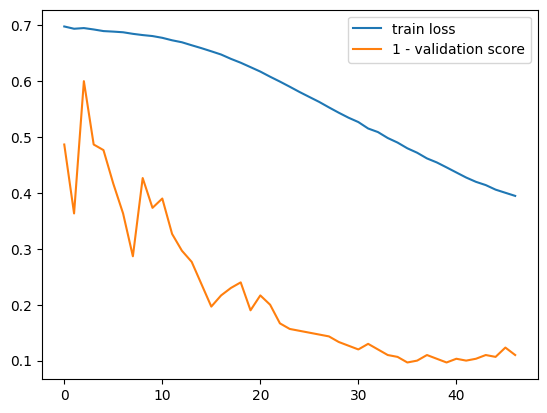

In [195]:
import matplotlib.pyplot as plt

plt.plot(range(len(clf.loss_curve_)), clf.loss_curve_, label="train loss")
plt.plot(range(len(clf.validation_scores_)), np.ones(len(clf.validation_scores_)) - clf.validation_scores_, label="1 - validation score")
plt.legend()

In [193]:
# Read the other functions and attributes

dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_best_coefs',
 '_best_intercepts',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no_improvement_count',
 '_optimizer',
 '_parameter_constraints',
 '_predict',
 '_random_state',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_score',
 '